Generate a visualization of the TS dataset

In [ ]:
import os
import sys
sys.path.append(os.path.split(os.getcwd())[0] + '\\helpers')
import numpy as np
from file_utils import load_txt_data_for_eval, read_config
from draw_utils import annotate_frame
import keybox_utils as ku
import cv2
import matplotlib.pyplot as plt

In [2]:
MOT_results_path = 'C:\\Users\\espen\\Documents\\work\\salmon_welfare_monitoring\\data\\salmon_component_tracking\\associator\\not_track\\output\\salmon_tracking\\analysis1\\MOT_results.txt'
config = read_config(os.path.join(os.path.dirname(MOT_results_path), 'config.yml'))
config['additional_kps'] = []
config['bp_bbox_thickness'] = 6
config['salmon_bbox_thickness'] = 8
frame_num = 190

In [3]:
targets = load_txt_data_for_eval(MOT_results_path)

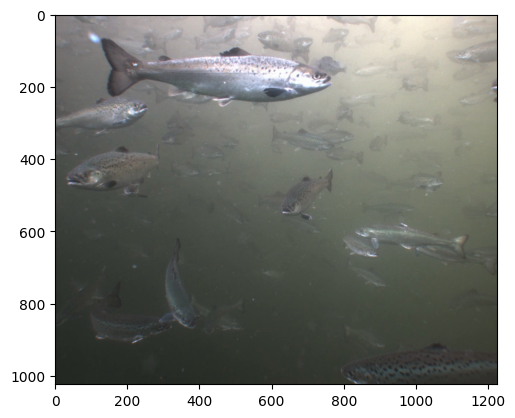

In [4]:
video = cv2.VideoCapture(config['video_path'])
video.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
ret, frame = video.read()
plt.imshow(frame)

In [5]:
def annotate_frame_mot(mot_targets, frame, frame_num, config):
    comp_type_ints = np.array([config['components'].index(l) for l in mot_targets[:,10:]]).reshape(mot_targets.shape[0], 1)
    comp_ids = mot_targets[:,1:2].astype(int)
    function_targets = np.hstack([np.array([ku.xywh2xyxy(b.astype(float).astype(int)) for b in mot_targets[:,2:6]]), comp_ids, mot_targets[:,6:7], comp_type_ints]).astype(float)
    annot_frame = annotate_frame(function_targets, frame, frame_num, config, True, font_scale=2)
    return annot_frame
annot_frame = annotate_frame_mot(targets[targets[:,0]==str(frame_num)], frame.copy(), frame_num, config)
annot_frame = cv2.cvtColor(annot_frame, cv2.COLOR_BGR2RGB)

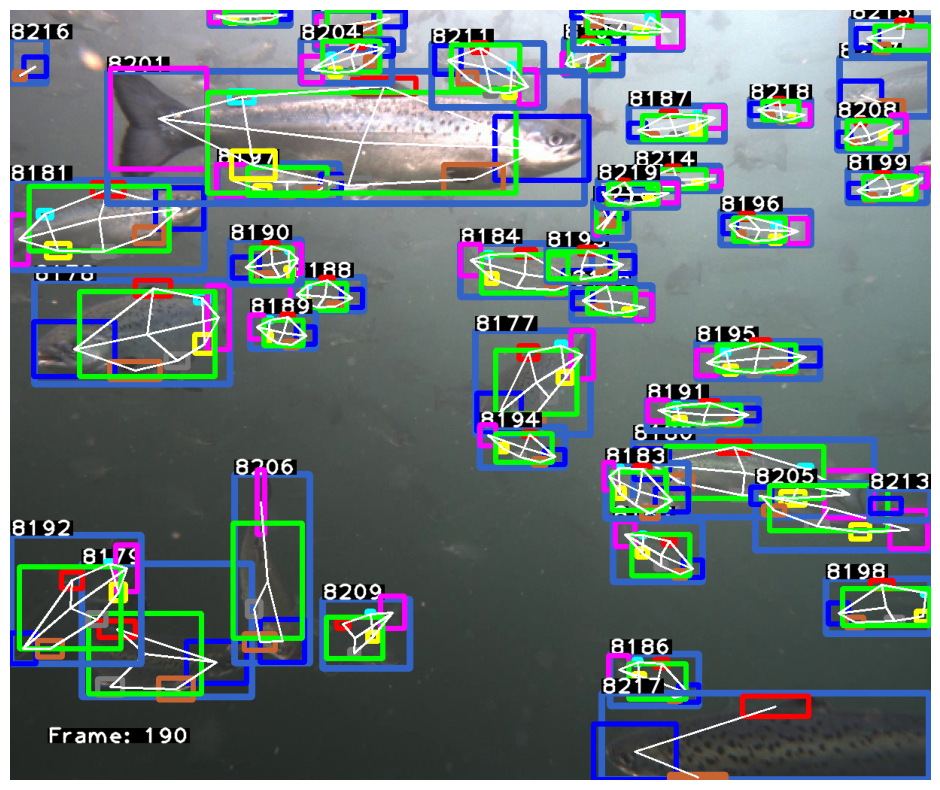

False

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(annot_frame)
ax.axis('off')
plt.show()
# Save the annotated frame
output_path = os.path.join(os.path.join('C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\', 'paper_plots'), f'annotated_frame_{frame_num}.png')
cv2.imwrite(output_path, cv2.cvtColor(annot_frame, cv2.COLOR_RGB2BGR))